In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#plt.style.use('classic')

In [2]:
base = "https://raw.githubusercontent.com/pathstream-curriculum/Python/master/"
retail_features = "retail_features_4stores.csv"
retail_sales = "retail_sales_4stores.csv"

In [3]:
retail_sales_df = pd.read_csv(base + retail_sales)
retail_features_df = pd.read_csv(base + retail_features)

In [4]:
# convert Date to datetime
retail_sales_df["Date"] = pd.to_datetime(retail_sales_df.Date)
retail_features_df["Date"] = pd.to_datetime(retail_sales_df.Date)
# convert Store and Dept to string
retail_sales_df["Store"] = retail_sales_df.Store.astype("str")
retail_sales_df["Dept"] = retail_sales_df.Dept.astype("str")
retail_features_df["Store"] = retail_features_df.Store.astype("str")

#deal with the sorting issue up front
retail_sales_df.sort_values("Date", inplace=True)
retail_features_df.sort_values("Date", inplace=True)

# Scatterplots!



In [5]:
store1_features = retail_features_df.loc[retail_features_df.Store == "1"]

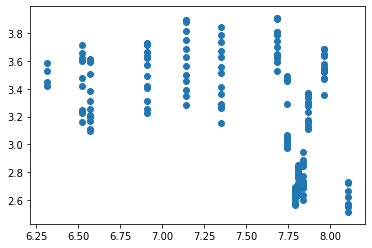

In [6]:
fig, ax = plt.subplots()
ax.scatter(store1_features["Unemployment"], store1_features["Fuel_Price"])

Text(0, 0.5, 'Fuel Price ($)')

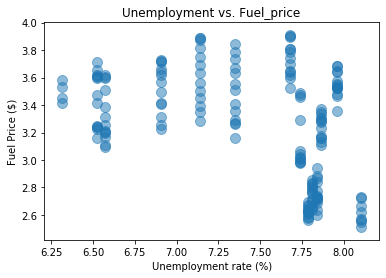

In [7]:
fig, ax = plt.subplots()
ax.scatter(store1_features["Unemployment"],
           store1_features["Fuel_Price"],
           alpha = 0.5,
            s=100)
ax.set_title("Unemployment vs. Fuel_price")
ax.set_xlabel("Unemployment rate (%)")
ax.set_ylabel("Fuel Price ($)")

# Line Plots!
only use with time data!

In [10]:
store1_d1_sales = retail_sales_df.loc[retail_sales_df.Store ==  "1"].loc[retail_sales_df.Dept == "1"]

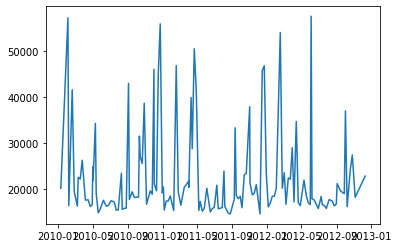

In [11]:
fig, ax = plt.subplots()
ax.plot(store1_d1_sales["Date"], store1_d1_sales["Weekly_Sales"])

In [15]:
# let's narrow this down to a single year
store1_d1_sales2010 = store1_d1_sales.loc[store1_d1_sales["Date"].dt.year == 2010]

Text(0.5, 1.0, 'Weekly Sales, 2010, Store 1 Dept 1')

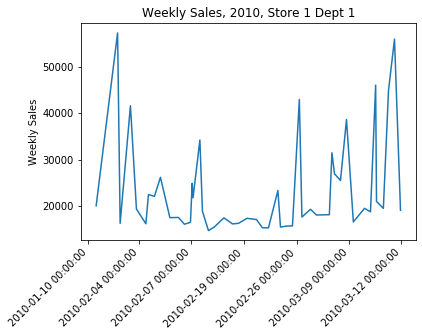

In [17]:
fig, ax = plt.subplots()
ax.plot(store1_d1_sales2010["Date"], store1_d1_sales2010["Weekly_Sales"])
ax.set_xticklabels(labels=store1_d1_sales2010["Date"],rotation=45, ha="right")
ax.set_label("Date")
ax.set_ylabel("Weekly Sales")
ax.set_title("Weekly Sales, 2010, Store 1 Dept 1")

In [55]:
# plot multiple lines on one axes object
def get_dept(sales_df, dept, store=1):
    store_and_dept = sales_df.loc[sales_df["Store"]==store].loc[sales_df["Dept"]==dept]
    store_and_dept_sorted = store_and_dept.sort_values("Date")
    return store_and_dept_sorted
    
    

In [60]:
s1d1 = get_dept(retail_sales_df, 1)
s1d2 = get_dept(retail_sales_df, 2)
s1d3 = get_dept(retail_sales_df, 3)
s1d4 = get_dept(retail_sales_df, 4)


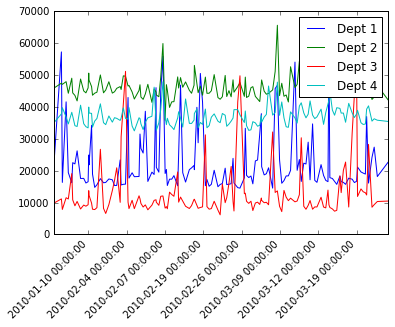

In [65]:
# we can play with things like size, line width, etc, to make this easier to read. 
# also needs titles + axis labels. 
fig, ax = plt.subplots()
ax.plot(s1d1["Date"], s1d1["Weekly_Sales"], label="Dept 1")
ax.plot(s1d2["Date"], s1d2["Weekly_Sales"], label="Dept 2")
ax.plot(s1d3["Date"], s1d3["Weekly_Sales"], label="Dept 3")
ax.plot(s1d4["Date"], s1d4["Weekly_Sales"], label="Dept 4")
ax.set_xticklabels(labels=store1_d1_sales2020["Date"],rotation=45, ha="right")
plt.legend()

# Bar Charts!

In [18]:
# you will often find yourself doing groupbys in preparation for bar charts

# let's filter the entire sales dataset down to the year 2010, then group by store
# first, let's create year columns for the original df 
retail_sales_df["Year"] = retail_sales_df["Date"].dt.year

In [19]:
retail_sales_2010 = retail_sales_df.loc[retail_sales_df["Year"] == 2010]

In [20]:
retail_sales_2010_gbstore = retail_sales_2010.groupby("Store").agg({"Weekly_Sales": sum})

<BarContainer object of 4 artists>

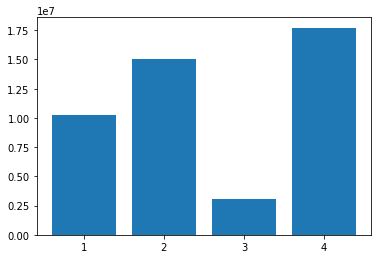

In [22]:
fig, ax = plt.subplots()
ax.bar(retail_sales_2010_gbstore.index, retail_sales_2010_gbstore["Weekly_Sales"])

In [96]:
# Grouped bar charts are kind of complicated. Not sure if we want to go there. 